In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data = pd.read_csv("./Salary_Data.csv")
data

YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0

In [3]:
x_train, x_test, y_train, y_test = train_test_split(data["YearsExperience"], data["Salary"],test_size= 0.3)


In [4]:
class OLS:
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def train(self, x_train, y_train):
        x_mean = x_train.mean()
        y_mean = y_train.mean()
        numerator = 0
        denominator = 0
        for (x,y) in zip(x_train, y_train):
            numerator = numerator + (x - x_mean)*(y - y_mean)
            denominator = denominator + (x-x_mean)**2
        self.b1 = numerator/denominator
        self.b0 = y_mean - self.b1*x_mean
    def predict(self, x_test):
        y_predict = []
        for x in x_test:
            y_predict.append((self.b0 + self.b1*x))
        return y_predict
            

In [5]:
model = OLS()
model.train(x_train, y_train)
y_testing_data = model.predict(x_test)
y_trainingPredict = model.predict(x_train)

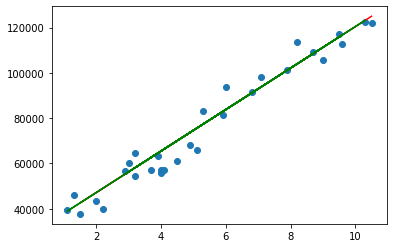

In [6]:
plt.scatter(data["YearsExperience"], data["Salary"])
plt.plot(x_test, y_testing_data, color="red")
plt.plot(x_train, y_trainingPredict, color="red")
plt.show()